# Integración numérica ("cuadratura")

A menudo en la física, es necesario evaluar integrales feas. [La verdad es que casi todas las integrales son feas...] Mientras que la diferenciación es un proceso que se puede llevar a cabo de manera algorítmica, siguiendo una receta, la integración no lo es. De hecho, se puede demostrar que hay integrales que no se pueden llevar a cabo de forma analítica en términos de las funciones elementales; un ejemplo famoso, y de suma importancia, es la llamada [función error](https://es.wikipedia.org/wiki/Funci%C3%B3n_error), dada por

$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2} \, dt,$$

la cual está estrechamente relacionada con la probabilidad de eventos para una variable aleatoria distribuida de forma normal (gaussiana).

Por lo tanto, necesitamos encontrar maneras de aproximar integrales definidas, de forma numérica.

Recordemos que la integral 

$$I(f) = \int_a^b f(x) \, dx$$ 

representa el **área debajo de la curva $y=f(x)$ entre $x=a$ y $x=b$**. Por lo tanto, la integración numérica también se llama "cuadratura numérica". [Ver, por ejemplo, https://es.wikipedia.org/wiki/Cuadratura_del_c%C3%ADrculo.] Por lo tanto, da una manera de aproximar numéricamente una **integral de Riemann**.

Nota que la integral $I(f)$ es una función [de hecho, un "funcional"] **lineal** de $f$. Por lo tanto, buscaremos métodos numéricos con la misma propiedad. Siguiendo la pista que vimos en el notebook sobre la interpolación, pensamos en **discretizar** (por supuesto). Una forma de hacerlo es evaluar la función $f$ en $N+1$ **nodos** $x_j$, y buscaremos **pesos** $\alpha_i$ que den una aproximación a la integral de la forma

$$Q(f) = \sum_{i=0}^N \alpha_j \, f(x_j), \qquad  (*)$$

es decir como una suma ponderada de los valores de la función en los nodos.

#### Ejercicio 1

Un caso particular es una $f$ que sea **monótona**, por ejemplo el integrando $f$ que aparece en la función $\mathrm{erf}$, dado por $f(x) = e^{-x^2/2}$. 

(i) La idea más natural [pero ¡no necesariamente mejor!] es dividir el intervalo $[0, x]$ en $N$ intervalos iguales de longitud $h=1/N$. Dada una $x$ y una $N$, dibuja la función, así como líneas verticales punteadas [dibujar con `linestyle=:dash`] en los nodos.
Grafícalo.

In [1]:
using Plots

In [2]:
using SymPy

In [3]:
x=Sym=("x")

"x"

In [1]:
vx=[]
s=5
N=50
vy=[]
for i in 1:N
    push!(vx,s*(i/N))
    push!(vy,exp(-(vx[i]^2)/2))
end
 

In [2]:
vx

50-element Array{Any,1}:
 0.1               
 0.2               
 0.3               
 0.4               
 0.5               
 0.6               
 0.7000000000000001
 0.8               
 0.8999999999999999
 1.0               
 1.1               
 1.2               
 1.3               
 ⋮                 
 3.9000000000000004
 4.0               
 4.1               
 4.2               
 4.3               
 4.4               
 4.5               
 4.6000000000000005
 4.699999999999999 
 4.8               
 4.9               
 5.0               

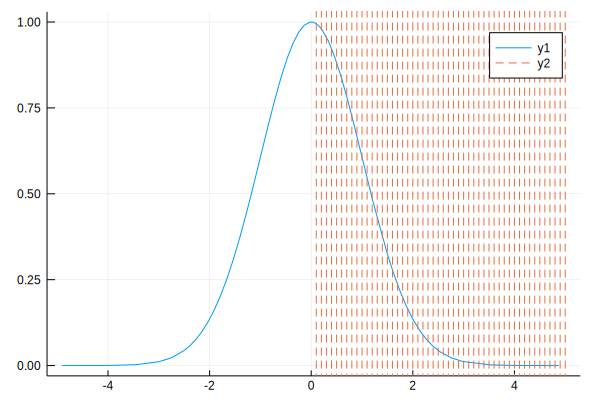

In [5]:
plot(x->exp(-(x^2)/2))
plot!(vline!(vx,vx,linestyle=:dash)) 

(ii) La idea más sencilla es aproximar la función $f$ en un intervalo dado con una recta horizontal. 
¿Cómo podríamos calcular tanto una cota inferior como una cota superior, suponiendo que $f$ es monótona? Exprésalos en la forma de la ecuación (*). Grafícalos.

Escribe una función que calcule estas áreas dadas $f$ (monótona), $a$, $b$ y $N$.

In [6]:
function area_inf(f,a,b,N)
    suma=0
    x0=a
    
    for i in 1:N
        
        x1=(a+(b-a)*(i/N))
       if f(x0)<f(x1)
        suma=suma+(x1-x0)*f(x0)
            else
            suma=suma+(x1-x0)*f(x1)
        end
        x0=x1
    end
    return suma
end
function area_sup(f,a,b,N)
     suma=0
    x0=a
    
    for i in 1:N
        x1=(a+(b-a)*(i/N))
          if f(x0)<f(x1)
        suma=suma+(x1-x0)*f(x1)
            else
          suma=suma+(x1-x0)*f(x0)
        end
        x0=x1
    end
    return suma
end

area_sup (generic function with 1 method)

In [7]:
area_inf(x->exp(-(x^2)),-100,0,1000)

0.8362269254527579

In [8]:
area_sup(x->x^2,0,-2,1000)

-2.6706680000000027

(iii) ¿Cuál es la tasa de convergencia hacia el resultado exacto cuando $N \to \infty$ para $f(x) = e^{-x^2/2}$? [Pista: La función $\mathrm{erf}$ en Julia se llama... `erf`. Se encuentra en el paquete `SpecialFunctions.jl`.]

In [9]:
area_inf(x->exp(-0.5*(x^2)),-1000,1000,100000)

2.4866282746309976

In [10]:
as=[]
ai=[]

for i in 10:10:500
    push!(as,area_sup(x->exp(-0.5*(x^2)),-1000,1000,i))
    push!(ai,area_inf(x->exp(-0.5*(x^2)),-1000,1000,i))
    end


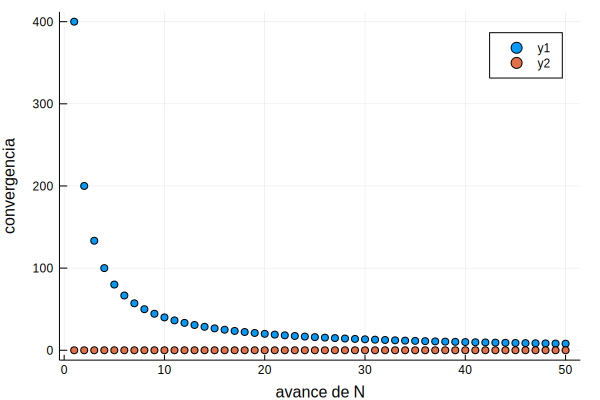

In [11]:
scatter(as,xlabel=("avance de N"), ylabel=("convergencia"))
scatter!(ai)

#### Ejercicio 2

(i) Dibuja las cotas inferior y superior para $\mathrm{erf}(x)$, como función de $x$.

In [12]:
using SpecialFunctions

In [13]:
area_sup(x->exp(-(x^2)),0,10,100)*(2/sqrt(pi))

1.0564189583547756

In [14]:
j=[1]
for i in 2:3
push!(j,i)
end
j

3-element Array{Int64,1}:
 1
 2
 3

In [15]:

n=100
vx=[]
vs=[]
vi=[]
x0=-5 #punto donde deseo iniciar

for i in 1:n
    push!(vx,x0+(i/n)*2*abs(x0))#si se usara 0 como x0 quitar este abs(x0)
    push!(vs,area_sup(x->exp(-(x^2)),0,vx[i],abs(vx[i]*10))*(2/sqrt(pi)))
    push!(vi,area_inf(x->exp(-(x^2)),0,vx[i],abs(vx[i]*10))*(2/sqrt(pi)))
end


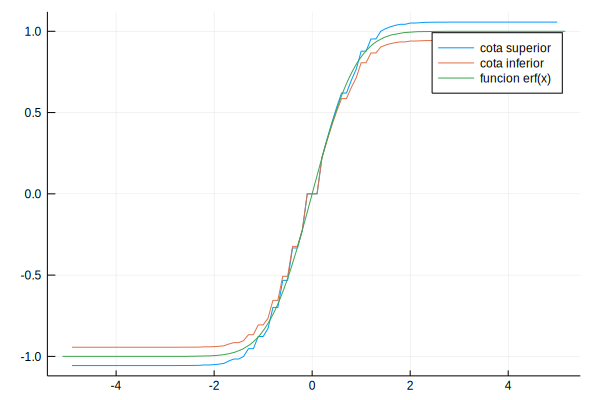

In [16]:
plot(vx,vs,label=("cota superior"))
plot!(vx,vi, label=("cota inferior"))
plot!(x->erf(x),label=("funcion erf(x)"))





(ii) Encuentra una cota superior analítica para $\int_{t=x}^\infty e^{-t^2/2} dt$. [Pista: puedes utilizar, por ejemplo, $f(t) \le e^{-t}$ para $t$ suficientemente grande. [¿Qué tan grande?].] 

ahora, condideremos t tan grande como querramos pero con la condicion que $1<t$ con lo que tenemos que $\frac{t}{2}<t \rightarrow -t<-\frac{t}{2}$ por otro lado tenemos que $t<t^2 \rightarrow -t>-t^2 \rightarrow -\frac{t}{2}>-\frac{t^2}{2} \Rightarrow exp(-\frac{t}{2})>exp(-\frac{t^2}{2}) $ 

integrando ambas partes se preserva la desigualdad para $x$ positivas $\int_{t=x}^\infty e^{-t^2/2} dt<\int_{t=x}^\infty e^{-t/2} dt=2e^{-x/2}$ con $x>1$, está sería una cota superior para nuestra integral.

(iii) Así, encuentra cotas para $\lim_{x \to \infty} \mathrm{erf}(x)$. ¿Cuál valor analítica tiene? Así, podemos encontrar cotas para integrales con rango infinito.

$lim_{x\rightarrow \infty}erf(x)=\frac{2}{\sqrt\pi}\int_{0}^{t=x} e^{-t^2} dt+ \frac{2}{\sqrt\pi}\int_{t=x}^\infty e^{-t^2} dt<\frac{2}{\sqrt\pi}\int_{0}^{t=x} e^{-t^2} dt+ \frac{2}{\sqrt\pi}e^{-x}$ con $x>1$ tenemos asi un limite analitico para $x\rightarrow \infty$ calculemos un continuio para $x=>1$


con $cotasup=lim_{x\rightarrow \infty}erf(x)$

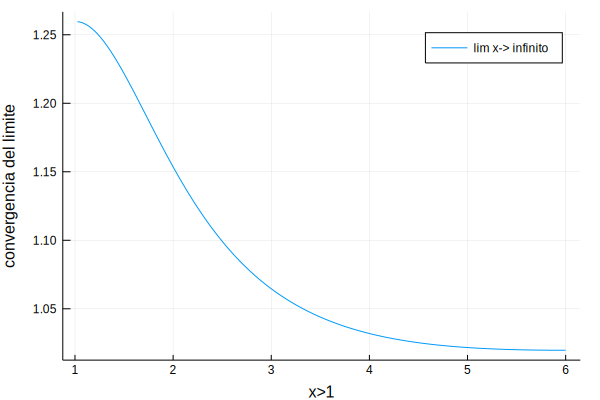

In [17]:
cotasup=[]
aux=[]
for i in 1:200
    u=1+5*(i/200)
    push!(aux,u)
push!(cotasup,2/sqrt(pi)*(area_sup(x->exp(-(x^2)),0,u,200)+exp(-u)))
end
plot(aux,cotasup,xlabel=("x>1"), ylabel=("convergencia del limite"), label=("lim x-> infinito"))

#### Ejercicio 3

(i) Para funciones $f$ que no sean monótonas, ¿qué necesitaríamos poder hacer para encontrar cotas inferiores y superiores para $\int_a^b f$? [Esto es bastante más difícil. Se puede lograr utilizando la **aritmética de intervalos**, por ejemplo.]

si no es monotona, solo basta agregar un if...else con la  condicion de que value en el extremo del intervalo donde la funcion es mayor (para el caso de cota superior) y el caso analogo para la cota inferior, que de hecho ya esta incluido en mis funciones, pues noté este error antes de llegar a este punto. 

(i) Después de una recta horizontal, ¿cuál es la siguiente forma más natural de aproximar a la función $f$ adentro de un intervalo dado? ¿A qué aproximación de la integral lleva, expresada en la forma de la ecuación (*)? Grafícalo.  Este método se llama el **método del trapecio**.

la siguiente forma mas natural es considerar la diagonal que une la funcion valuada en los extremos del intervalo.


$$
I=
\int_a^b f(x)dx \approx \int_a^b f(a)+\frac{f(b)-f(a)}{b-a}(x-a) dx= 
$$
por lo que esta aproximacion esta dada por
$$
\frac{f(b)+f(a)}{2}(b-a)
$$
y expresandolo en terminos de la ecuacion (*) tenemos que 
$$
Q(f)=\sum_{i=0}^N \alpha_i \frac{f(x_{i+1})+f(x_{i})}{2}
$$
con 
$$
\alpha=x_{i+1}-x_{i}
$$

(ii) Impleméntalo. Nota que este método funciona para *cualquier* función $f$, sin que tenga que ser monótona.

In [18]:
function int_trap(f,a,b,N)
    suma=0
    x0=a
    for i in 1:N
        
        x1=(a+(b-a)*(i/N))
        
        suma=suma+(x1-x0)*((f(x1)+f(x0))/2)
          
        x0=x1
    end
    return suma
end

int_trap (generic function with 1 method)

In [19]:
int_trap(x->x^2,-2,2,100)

5.334400000000001

 
(iii) Aplícalo a algunas funciones cuyas integrales conoces y encuentra la 
tasa de convergencia. ¿Cómo se compara con el método de la pregunta [1]?

Hagamoslo para $x^3$ cuya integral es $\int_0^1 x^3=\frac{x^4}{4}=\frac{1}{4}$

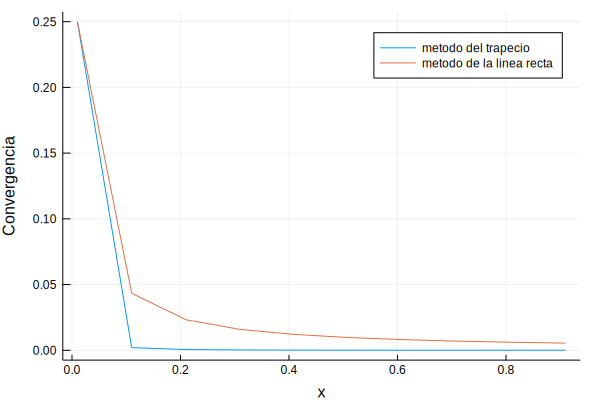

In [20]:
f(x)=x^3
auxint=[]
auxintx=[]
aunx=[]
N=100
for i in 1:10:N
    push!(auxintx,i/N)
  push!( auxint,int_trap(f,0,1,i)-0.25)
    push!(aunx,area_inf(f,0,1,i)-0.25)
end
plot(auxintx,auxint,ylabel=("Convergencia"),xlabel=("x"),label=("metodo del trapecio"))
plot!(auxintx,abs.(aunx),label=("metodo de la linea recta"))

#### Ejercicio 4

Lo que estamos haciendo es aproximar la función $f$ en cada sub-intervalo. La siguiente aproximación es una cuadrática, la cual lleva a una regla llamada el **método de Simpson**.

(i) Utiliza el método de interpolación de Lagrange para encontrar una expresión analítica para un polinomio que interpola la función $f$ en tres puntos: $x_i$, $x_{i+1}$, y el punto medio $m$ entre $x_i$ y $x_{i+1}$.

In [21]:
include("herramientas.jl")

interpolar (generic function with 1 method)

In [22]:
function inter_3(f,a,b)
    c=(a+b)/2
    L=interpolar([a,c,b],[f(a),f(c),f(b)])
    return L
end

inter_3 (generic function with 1 method)

(ii) Integra este polinomio para encontrar $\int_{x_i}^{x_{i+1}} f(t) \, dt$. 

In [23]:
function int_3(f,a,b)
    L=inter_3(f,a,b)
    c=(a+b)/2
    suma=((b-a)/6)*(L(a)+L(b)+4*L(c))
    return suma
    
end
    

int_3 (generic function with 1 method)

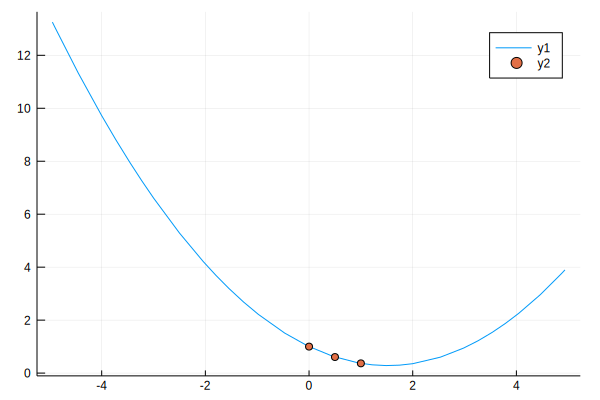

In [24]:
plot(inter_3(x->exp(-x),0,1))
scatter!([0,0.5,1],[exp(-0),exp(-0.5),exp(-1)])

(iii) Así, encuentra una aproximación para $\int_{a}^{b} f(t) \, dt$.

In [25]:
function int(f,a,b,N)
    suma=0
    x0=a
     for i in 1:N
        
        x1=(a+(b-a)*(i/N))
        
        suma=suma+int_3(f,x0,x1)
          
        x0=x1
    end
    return suma
        
end

int (generic function with 1 method)

In [26]:
int(x->exp(-0.5*x^2),-1000,1000,100000)

2.5066282746309985

(iv) Encuentra numéricamente la tasa de convergencia del método.

In [27]:
tasa=[]

g(x)=exp(x^2)
k=30
for i in 1:k
   
    push!(tasa,BigFloat(int(g,0,1,i)))
end


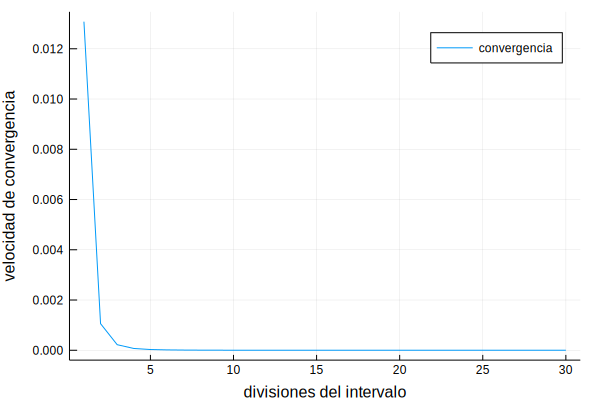

In [28]:
plot(tasa.-tasa[end],label=("convergencia"),ylabel=("velocidad de convergencia"),xlabel=("divisiones del intervalo"))

In [29]:
tasa[end]

1.462651769200052020991620338463690131902694702148437500000000000000000000000000

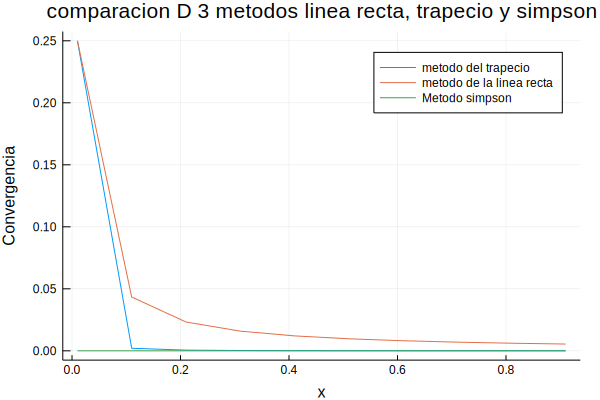

In [30]:
#comparacion de convergencia entre metodos
nuevo=[]
for i in 1:10:N
   
  push!( nuevo,int(f,0,1,i)-0.25)

end
plot(auxintx,auxint,ylabel=("Convergencia"),xlabel=("x"),label=("metodo del trapecio"),title=("comparacion D 3 metodos linea recta, trapecio y simpson"))
plot!(auxintx,abs.(aunx),label=("metodo de la linea recta"))
plot!(auxintx,nuevo, label=("Metodo simpson"))

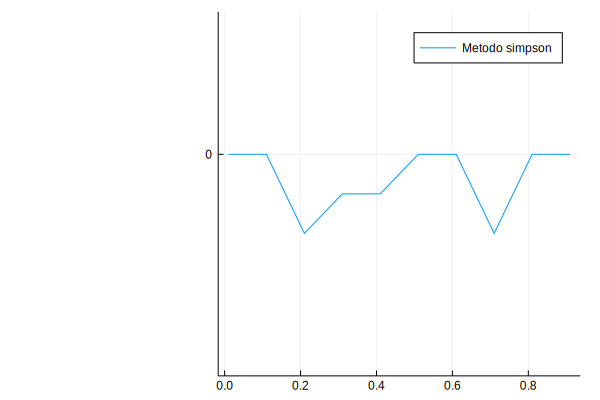

In [31]:
plot(auxintx,nuevo, label=("Metodo simpson"))

## Métodos más avanzados 

Hay métodos muy precisos, por ejemplo la llamada **cuadratura de Gauss**, que funcionan si la función es suave. En estos métodos, se puede utilizar la interpolación de Lagrange para aproximar una función con un polinomio *globalmente* en todo el rango $[a,b]$, y luego ¡se integra el polinomio! La dificultad es en escoger dónde deberían ser los nodos $x_i$.

[¡Esto podría ser un proyecto final interesante!]

Estos métodos se pueden extender a integrales en más dimensiones.